In [1]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import math


path = "KutubdiaBD.csv"
df = pd.read_csv(path)
df

,Year,Month,Day,Time,Humidity,Pressure,Temperature,Direction,WindSpeed
0,2018,1,1,0,95,101.11,21.0,310,0.514444
1,2018,1,1,3,87,101.30,23.0,0,0.250000
2,2018,1,1,6,84,101.31,23.2,0,0.250000
3,2018,1,1,9,78,101.05,24.2,350,0.514444
4,2018,1,1,12,91,100.97,22.4,0,0.250000
...,...,...,...,...,...,...,...,...,...
9483,2021,3,31,9,70,100.19,31.5,130,4.115556
9484,2021,3,31,12,76,100.07,29.0,140,3.086667
9485,2021,3,31,15,82,100.22,28.1,120,3.086667
9486,2021,3,31,18,83,100.31,27.5,130,3.601111


In [3]:
df = df.drop(['Year', 'Month', 'Day', 'Time'], axis =1)
df

,Humidity,Pressure,Temperature,Direction,WindSpeed
0,95,101.11,21.0,310,0.514444
1,87,101.30,23.0,0,0.250000
2,84,101.31,23.2,0,0.250000
3,78,101.05,24.2,350,0.514444
4,91,100.97,22.4,0,0.250000
...,...,...,...,...,...
9483,70,100.19,31.5,130,4.115556
9484,76,100.07,29.0,140,3.086667
9485,82,100.22,28.1,120,3.086667
9486,83,100.31,27.5,130,3.601111


In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
matplotlib.style.use('fivethirtyeight')


scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df)
robust_df = pd.DataFrame(robust_df, columns =['Humidity', 'Pressure', 'Temperature', 'Direction','WindSpeed'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df)
standard_df = pd.DataFrame(standard_df, columns =['Humidity', 'Pressure', 'Temperature', 'Direction','WindSpeed'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df)
minmax_df = pd.DataFrame(minmax_df, columns =['Humidity', 'Pressure', 'Temperature', 'Direction','WindSpeed'])

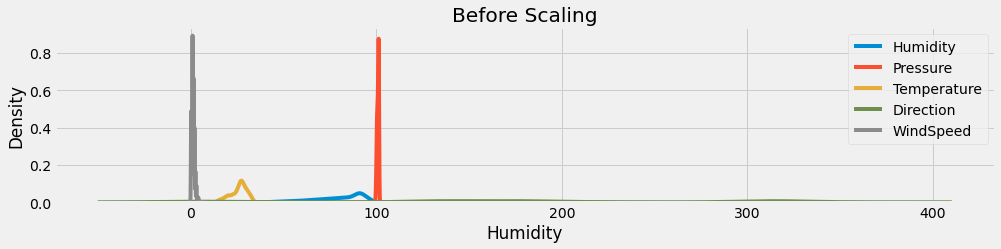

In [12]:
fig, (ax1) = plt.subplots(ncols = 1, figsize =(15, 3))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Humidity'], ax = ax1, label = 'Humidity' )
sns.kdeplot(df['Pressure'], ax = ax1, label='Pressure')
sns.kdeplot(df['Temperature'], ax = ax1, label='Temperature')
sns.kdeplot(df['Direction'], ax = ax1, label='Direction')
sns.kdeplot(df['WindSpeed'], ax = ax1, label='WindSpeed')
ax1.legend()

plt.show()

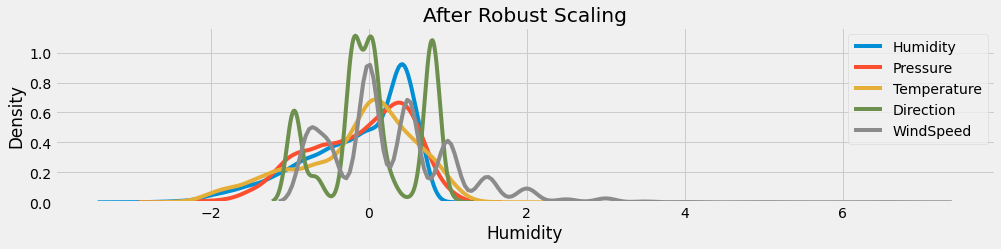

In [13]:
fig, (ax2) = plt.subplots(ncols = 1, figsize =(15, 3))

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df['Humidity'], ax = ax2, label='Humidity')
sns.kdeplot(robust_df['Pressure'], ax = ax2, label='Pressure')
sns.kdeplot(robust_df['Temperature'], ax = ax2, label='Temperature')
sns.kdeplot(robust_df['Direction'], ax = ax2, label='Direction')
sns.kdeplot(robust_df['WindSpeed'], ax = ax2, label='WindSpeed')
ax2.legend()

plt.show()

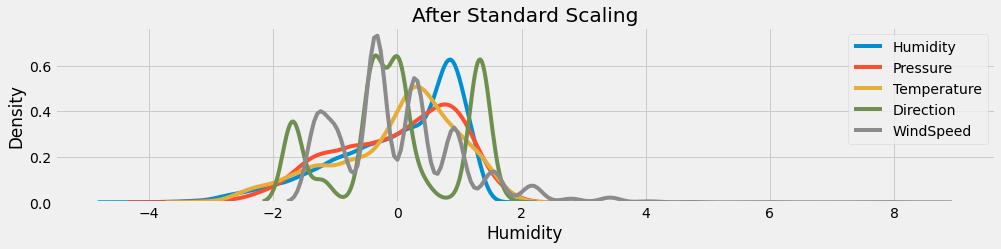

In [14]:
fig, (ax3) = plt.subplots(ncols = 1, figsize =(15, 3))

ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['Humidity'], ax = ax3, label='Humidity')
sns.kdeplot(standard_df['Pressure'], ax = ax3, label='Pressure')
sns.kdeplot(standard_df['Temperature'], ax = ax3, label='Temperature')
sns.kdeplot(standard_df['Direction'], ax = ax3, label='Direction')
sns.kdeplot(standard_df['WindSpeed'], ax = ax3, label='WindSpeed')
ax3.legend()

plt.show()

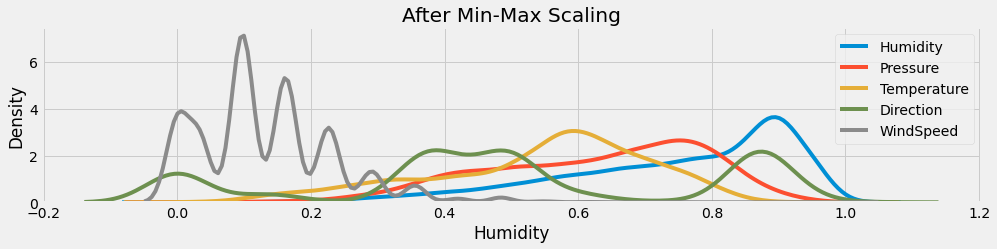

In [15]:
fig, (ax4) = plt.subplots(ncols = 1, figsize =(15, 3))

ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['Humidity'], ax = ax4, label='Humidity')
sns.kdeplot(minmax_df['Pressure'], ax = ax4, label='Pressure')
sns.kdeplot(minmax_df['Temperature'], ax = ax4, label='Temperature')
sns.kdeplot(minmax_df['Direction'], ax = ax4, label='Direction')
sns.kdeplot(minmax_df['WindSpeed'], ax = ax4, label='WindSpeed')
ax4.legend()

plt.show()